<a href="https://colab.research.google.com/github/DI21V7X323/khaikhoangdulieu/blob/main/lab3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Nhập thư viện

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

### Hiển thị dữ liệu

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

### Đọc dữ liệu

In [ ]:
data_path = "https://raw.githubusercontent.com/ltdaovn/dataset/master/advertising.csv"
data = pd.DataFrame(pd.read_csv(data_path))
data.info

<bound method DataFrame.info of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

### Làm sạch dữ liệu

#### 1. Kiểm tra dữ liệu Null

In [ ]:
data.isnull().sum()*100/data.shape[0]


TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

#### 2. Phát hiện dữ liệu ngoại lai

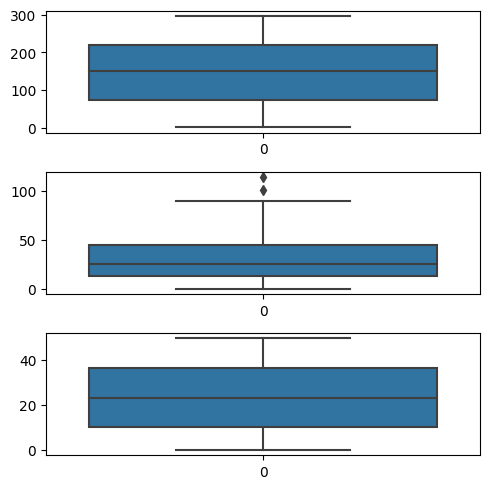

In [ ]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(data['TV'], ax = axs[0])
plt2 = sns.boxplot(data['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(data['Radio'], ax = axs[2])
plt.tight_layout()

#### Phân tích khám phá

### 1.Biến đầu ra (Sale)

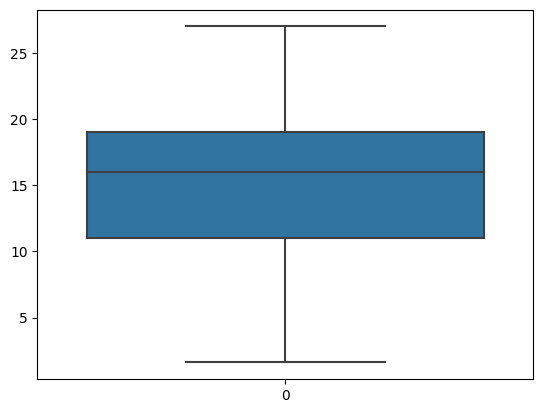

In [ ]:
sns.boxplot(data['Sales'])
plt.show()

### 2.Vẽ đồ thị phân tán (Scatter Plots) để phân tích mối quan hệ giữa biến đầu
ra (Sales) với các biến đầu vào

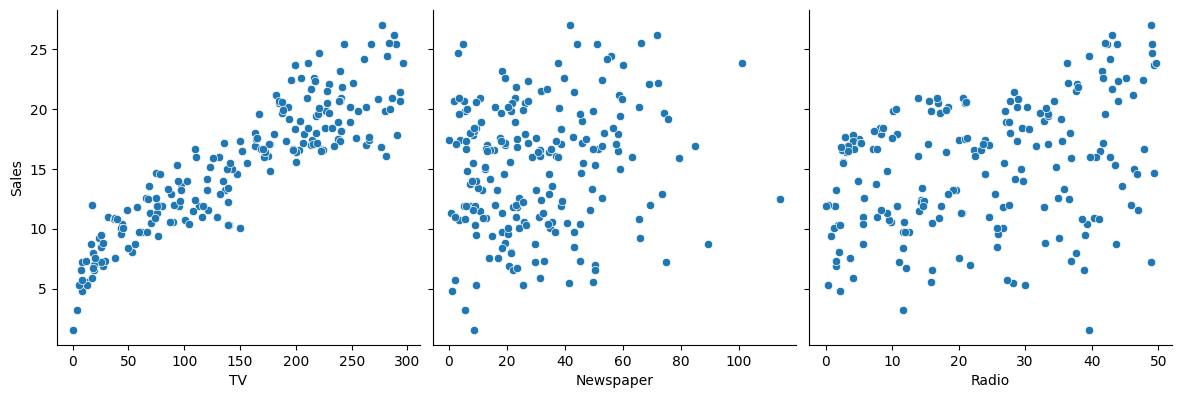

In [ ]:
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

### 3.Dùng heatmap để xem mối tương quan giữa các biến.

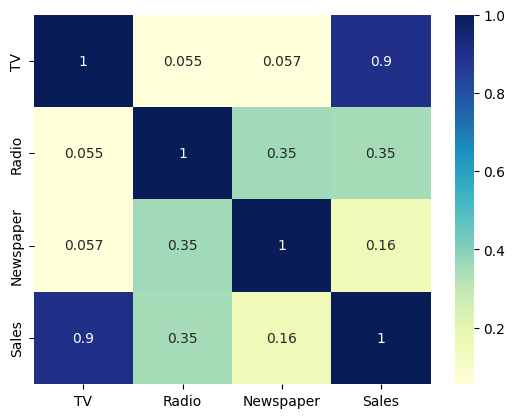

In [ ]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

### Qua Heatmap và Scatter Plots, chúng ta thấy rằng biến TV có vẻ tương quan nhất với Sales. Vì vậy, hãy tiếp tục và thực hiện hồi quy tuyến tính đơn giản bằng cách sử dụng TV làm biến đầu vào.

### Xây dựng mô hình hồi quy

In [ ]:
X = data[['TV']]
y = data['Sales']

### Chia thành 2 tập dữ liệu huấn luyện và kiểm tra

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

### Xây dựng mô hình hồi quy

In [ ]:
linearreg = LinearRegression()
linearreg.fit(X_train, y_train)

LinearRegression()

### Tính độ chính xác của mô hình

In [ ]:
y_predict = linearreg.predict(X_test)
print("Coefficients: ", linearreg.coef_)
print("Intercept: ", round(linearreg.intercept_,4))
print("Sales =", round(linearreg.intercept_,4), "+",
round(linearreg.coef_[0],4), "× TV")
print("mean_squared_error: ", np.sqrt(metrics.mean_squared_error(y_test,
y_predict))) #calculating the RMSE number

Coefficients:  [0.05565473]
Intercept:  6.9027
Sales = 6.9027 + 0.0557 × TV
mean_squared_error:  2.2564722695411


### Vẽ đường hồi quy trên tập dữ liệu huấn luyện

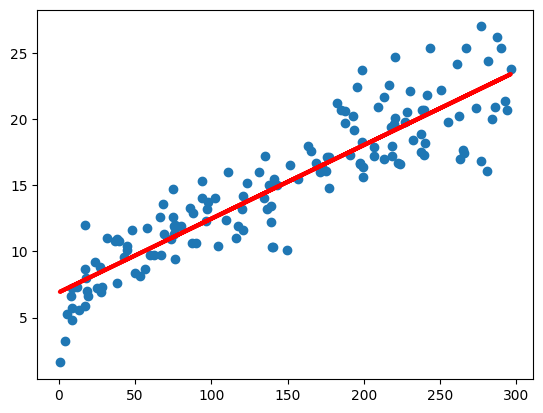

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_train, linearreg.predict(X_train), color='red', linewidth=3)

### Vẽ đường hồi quy trên tập dữ liệu kiểm tra

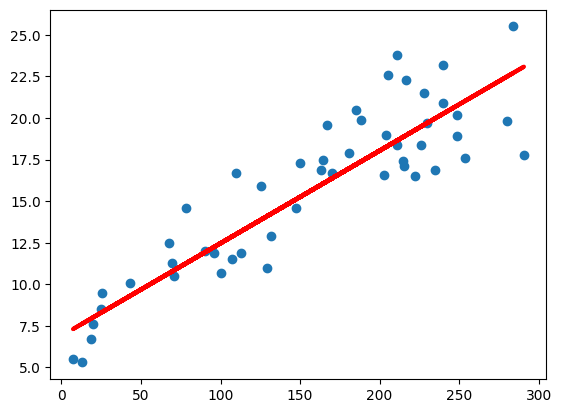

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_predict, color='red', linewidth=3)